importing all packages and libraries needed

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics




Importing the Boston House Price Dataset

In [67]:
house_price_dataset= sklearn.datasets.fetch_california_housing()

In [68]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

now we will organise this data and make it more structured using pandas

In [69]:
#loading the dataset to a pandas dataframe
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [70]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [71]:
#adding the target column which is price here to the dataframe
house_price_dataframe['price']=house_price_dataset.target

In [72]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
#checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [74]:
#checking for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

no missing values in the dataframe if there were to be some missing values we will us methods like dropping imputatuion

In [75]:
#stastistical measure of the dataset mean standard deviation max min etc
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


understanding the correlation between various features in the dataset

1.Positive correlation
2.Negative correlation

In [76]:
correlation =house_price_dataframe.corr()

<Axes: >

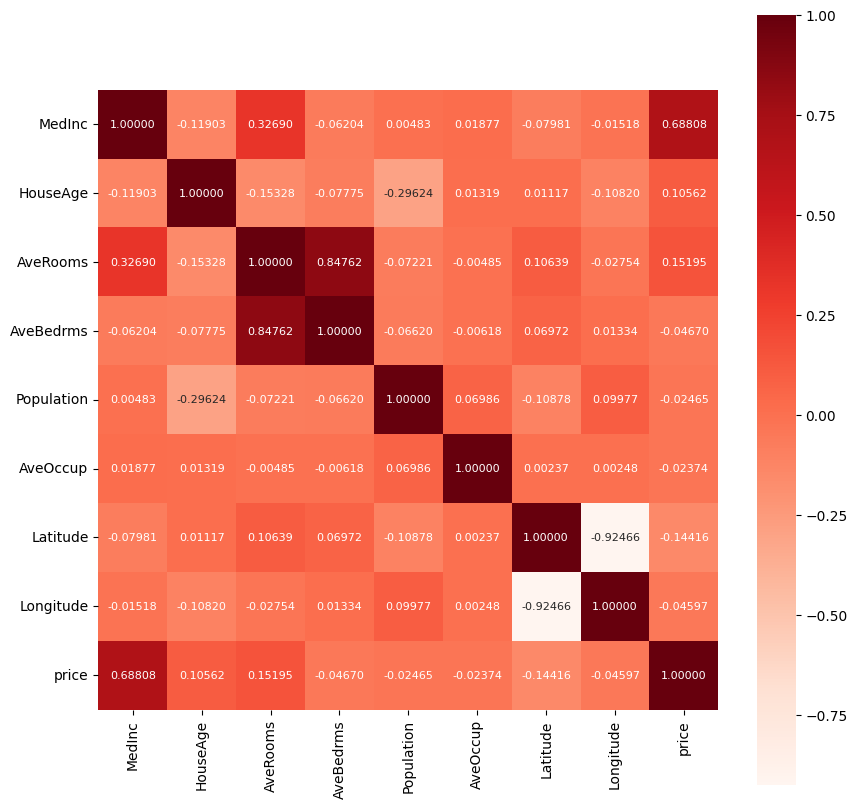

In [77]:
#constructing a heatmap to understand the correlation among the variables
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.5f',annot=True,annot_kws={'size':8},cmap='Reds')

Splitting the data and the price so that our machine can learn how other variable affect the pricing

In [78]:
x=house_price_dataframe.drop(['price'],axis=1)
y=house_price_dataframe['price']

In [79]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Processing part is done now we will be splitting the datasets into two parts training data and Test data
we split the data using"train_test_split" that we imported

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [81]:
print(x.shape,x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Now we are gonna do the model training using
XGBoost Regressor


In [131]:
#loading the model
model= XGBRegressor()

In [132]:
#training the model with x_train dataframe
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction of the Training Data


In [133]:
#accuracy for prediction on training data
training_data_prediction=model.predict(x_train)

In [134]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [135]:
#evalution of model using evaluation matrix
#R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("R squared error :", score_1)
print("mean absolute error :", score_2)

R squared error : 0.943650140819218
mean absolute error : 0.1933648700612105


Visualising the actual prices and predicted prices

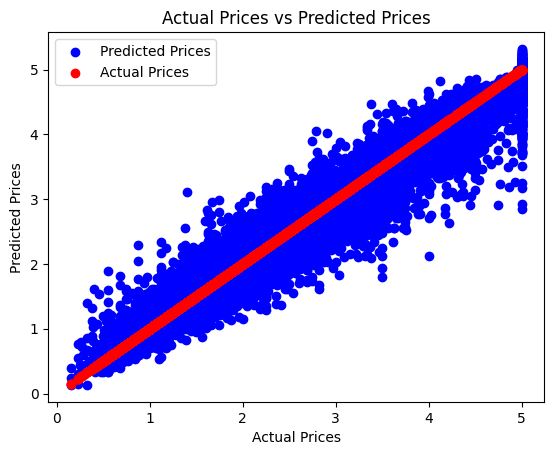

In [145]:
plt.scatter(y_train, training_data_prediction, color='blue', label='Predicted Prices')
plt.scatter(y_train, y_train, color='red', label='Actual Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()


prediction on Test Data Set

In [137]:
#accuracy for prediction on training dat
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [138]:
#evalution of model using evaluation matrix
#R squared error
score_3=metrics.r2_score(y_test,test_data_prediction)

#mean absolute error
score_4=metrics.mean_absolute_error(y_test,test_data_prediction)
print("R squared error :", score_3)
print("mean absolute error :", score_4)

R squared error : 0.8338000331788725
mean absolute error : 0.3108631800268186


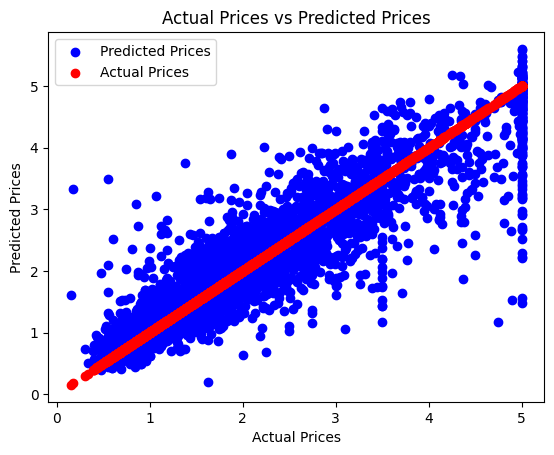

In [142]:
plt.scatter(y_test, test_data_prediction, color='blue', label='Predicted Prices')
plt.scatter(y_test, y_test, color='red', label='Actual Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()
